# Cluster Analysis in R

### Course Description
Cluster analysis is a powerful toolkit in the data science workbench. It is used to find groups of observations (clusters) that share similar characteristics. These similarities can inform all kinds of business decisions; for example, in marketing, it is used to identify distinct groups of customers for which advertisements can be tailored. In this course, you will learn about two commonly used clustering methods - hierarchical clustering and k-means clustering. You won't just learn how to use these methods, you'll build a strong intuition for how they work and how to interpret their results. You'll develop this intuition by exploring three different datasets: soccer player positions, wholesale customer spending data, and longitudinal occupational wage data.

1. Calculating distance between observations
2. Hierarchical clustering
3. K-means clustering
4. Case Study: National Occupational mean wage

In [3]:
# This sets plot images to a nice size.
options(repr.plot.width = 4, repr.plot.height = 4)

# Loading in the ggplot2 package
library(dplyr)
library(ggplot2)

In [2]:
#install.packages('dummies', repos='http://cran.us.r-project.org')
#install.packages('dendextend', repos='http://cran.us.r-project.org')

In [5]:
library(dummies)
library(dendextend)

# 1. Calculating distance between observations

Cluster analysis seeks to find groups of observations that are similar to one another, but the identified groups are different from each other. This similarity/difference is captured by the metric called distance. In this chapter, you will learn how to calculate the distance between observations for both continuous and categorical features. You will also develop an intuition for how the scales of your features can affect distance.

## What is cluster analysis? - Video

When to cluster?
In which of these scenarios would clustering methods likely be appropriate?

1) Using consumer behavior data to identify distinct segments within a market.

2) Predicting whether a given user will click on an ad.

3) Identifying distinct groups stocks that follow similar trading patterns.

4) Modeling & predicting GDP growth.

ANSWER THE QUESTION

Possible Answers
 - 1
 - 2
 - 4
 - 1 & 3 (Correct)
 - 2 & 4

## Distance between two observations - Video

### Calculate & plot the distance between two players
You've obtained the coordinates relative to the center of the field for two players in a soccer match and would like to calculate the distance between them.

In this exercise you will plot the positions of the 2 players and manually calculate the distance between them by using the euclidean distance formula

INSTRUCTIONS

 - Plot their positions from the two_players dataframe using ggplot
 - Extract the positions of the players into two data frames player1 and player2
 - Calculate the distance between player1 and player2 by using the euclidean distance formula
 - (x1−x2)2+(y1−y2)2−−−−−−−−−−−−−−−−−−√

In [1]:
two_players = data.frame(x=c(5, 15),y=c(4, 10))
two_players

x,y
5,4
15,10


[1] 11.6619

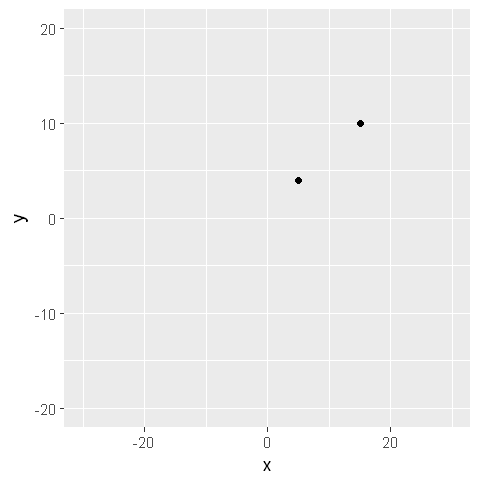

In [9]:
# Plot the positions of the players
ggplot(two_players, aes(x = x, y = y)) + 
  geom_point() +
  # Assuming a 40x60 field
  lims(x = c(-30,30), y = c(-20, 20))

# Split the players data frame into two observations
player1 <- two_players[1,]
player2 <- two_players[2,]

# Calculate and print their distance using the Euclidean Distance formula
player_distance <- sqrt( (player1$x - player2$x)^2 + (player1$y - player2$y)^2 )
player_distance

### Using the dist() function
Using the euclidean formula manually may be practical for 2 observations but can get more complicated rather quickly when measuring the distance between many observations.

The dist() function simplifies this process by calculating distances between our observations (rows) using their features (columns). In this case the observations are the player positions and the dimensions are their x and y coordinates.

Note: The default distance calculation for the dist() function is euclidean distance

INSTRUCTIONS

 - Calculate the distance between two players using the dist() function for the dataframe two_players
 - Calculate the distance between three players for the dataframe three_players

In [11]:
three_players = data.frame(x = c(5, 15, 0), y = c(4, 10, 20))

In [12]:
# Calculate the Distance Between two_players
dist_two_players <- dist(two_players)
dist_two_players

# Calculate the Distance Between three_players
dist_three_players <- dist(three_players)
dist_three_players

        1
2 11.6619

         1        2
2 11.66190         
3 16.76305 18.02776

### Who are the closest players?
You are given the data frame containing the positions of 4 players on a soccer field.

This data is preloaded as four_players in your environment and is displayed below.

Player	x	y
1	5	4
2	15	10
3	0	20
4	-5	5


Work in the R console to answer the following question:

Which two players are closest to one another?

INSTRUCTIONS

Possible Answers
 - 1 & 2
 - press 1
 - 1 & 3
 - press 2
 - 1 & 4 (Correct)
 - press 3
 - 2 & 3
 - press 4
 - 2 & 4
 - press 5
 - 3 & 4
 - press 6
 - Not enough information to decide
 - press 7


## The importance of scale - Video

### Effects of scale
You have learned that when a variable is on a larger scale than other variables in your data it may disproportionately influence the resulting distance calculated between your observations. Lets see this in action by observing a sample of data from the trees data set.

You will leverage the scale() function which by default centers & scales our column features.

Our variables are the following:

 - Girth - tree diameter in inches
 - Height - tree height in inches

INSTRUCTIONS

 - Calculate the distance matrix for the dataframe three_trees and store it as dist_trees
 - Create a new variable scaled_three_trees where the three_trees data is centered & scaled
 - Calculate and print the distance matrix for scaled_three_trees and store this as dist_scaled_trees
 - Output both dist_trees and dist_scaled_trees matrices and observe the change of which observations have the smallest distance between the two matrices (hint: they have changed)

In [16]:
three_trees = data.frame(Girth = c(8.3, 8.6, 10.5), Height = c(840, 780, 864))
three_trees

Girth,Height
8.3,840
8.6,780
10.5,864


In [17]:
# Calculate distance for three_trees 
dist_trees <- dist(three_trees)

# Scale three trees & calculate the distance  
scaled_three_trees <- scale(three_trees)
dist_scaled_trees <- dist(scaled_three_trees)

# Output the results of both Matrices
print('Without Scaling')
dist_trees

print('With Scaling')
dist_scaled_trees

[1] "Without Scaling"


         1        2
2 60.00075         
3 24.10062 84.02149

[1] "With Scaling"


         1        2
2 1.409365         
3 1.925659 2.511082

Notice that before scaling observations 1 & 3 were the closest but after scaling observations 1 & 2 turn out to have the smallest distance.

### When to scale data?
Below are examples of datasets and their corresponding features.

In which of these examples would scaling not be necessary?

ANSWER THE QUESTION

Possible Answers
 - `Taxi Trips - tip earned ($), distance traveled (km)`
 - press 1
 - `Health Measurements of Individuals - height (meters), weight (grams), body fat percentage (%)`
 - press 2
 - `Student Attributes - average test score (1-100), distance from school (km), annual household income ($)`
 - press 3
 - `Salespeople Commissions - total yearly commision ($), number of trips taken`
 - press 4
 - `None of the above, they all should be scaled when measuring distance.`
 - press 5

## Measuring distance for categorical data - Video

Calculating distance between categorical variables
In this exercise you will explore how to calculate binary (Jaccard) distances. In order to calculate distances will first have to dummify our categories using the dummy.data.frame() from the library dummies

You will use a small collection of survey observations stored in the data frame job_survey with the following columns:

 - job_satisfaction Possible options: "Hi", "Mid", "Low"
 - is_happy Possible options: "Yes", "No"

INSTRUCTIONS

 - Create a dummified dataframe dummy_survey
 - Generate a Jaccard distance matrix for the dummified survey data dist_survey using the dist() function using the parameter method = 'binary'
 - Print the original data and the distance matrix
 - Note the observations with a distance of 0 in the original data (1, 2, and 4)

In [24]:
job_satisfaction = c("Low", "Low", "Hi", "Low", "Mid")
is_happy = c("No", "No", "Yes", "No", "No")
job_survey = data.frame(job_satisfaction=job_satisfaction,is_happy=is_happy)

In [25]:
job_survey

job_satisfaction,is_happy
Low,No
Low,No
Hi,Yes
Low,No
Mid,No


In [21]:
#install.packages('dummies', repos='http://cran.us.r-project.org')

Installing package into 'C:/Users/Lenovo/Documents/R/win-library/3.3'
(as 'lib' is unspecified)


package 'dummies' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Lenovo\AppData\Local\Temp\Rtmpacoiqq\downloaded_packages


In [22]:
library(dummies)

dummies-1.5.6 provided by Decision Patterns



In [26]:
# Dummify the Survey Data
dummy_survey <- dummy.data.frame(job_survey)

# Calculate the Distance
dist_survey <- dist(dummy_survey, method="binary")

# Print the Original Data
job_survey

# Print the Distance Matrix
dist_survey

job_satisfaction,is_happy
Low,No
Low,No
Hi,Yes
Low,No
Mid,No


          1         2         3         4
2 0.0000000                              
3 1.0000000 1.0000000                    
4 0.0000000 0.0000000 1.0000000          
5 0.6666667 0.6666667 1.0000000 0.6666667

Notice that this distance metric successfully captured that observations 1 and 2 are identical (distance of 0)

### The closest observation to a pair
Below you see a pre-calculated distance matrix between four players on a soccer field. You can clearly see that players 1 & 4 are the closest to one another with a euclidean distance value of 10.

`1	2	3
2	11.7		
3	16.8	18.0	
4	10.0	20.6	15.8`

If 1 and 4 are the closest players among the four, which player is closest to players 1 and 4?

ANSWER THE QUESTION

 - Possible Answers
 - Clearly its player 2!
 - press 1
 - No! Player 3 makes more sense.
 - press 2
 - Are you kidding me? There isn't enough information to decide. (Correct)
 - press 3


We clearly don't have enough information to make this decision without knowing how we compare one observation to a pair of observations. 

## 2. Hierarchical clustering

This chapter will help you answer the last question from chapter 1 - how do you find groups of similar observations (clusters) in your data using the distances that you have calculated? You will learn about the fundamental principles of hierarchical clustering - the linkage criteria and the dendrogram plot - and how both are used to build clusters. You will also explore data from a wholesale distributor in order to perform market segmentation of clients using their spending habits.

## Comparing more than two observations - Video

### Calculating linkage
Let us revisit the example with three players on a field. The distance matrix between these three players is shown below and is available as the variable dist_players.

From this we can tell that the first group that forms is between players 1 & 2, since they are the are the closest to one another with a euclidean distance value of 11.

Now you want to apply the three linkage methods you have learned to determine what the distance of this group is to player 3.

1	2
2	11	
3	16	18
INSTRUCTIONS

 - Extract the distance values between all three pairs of players into individual variables
 - Calculate the distance from player 3 to the group of players 1 & 2 using the following three linkage methods
 - Complete: the resulting distance is based on the maximum
 - Single: the resulting distance is based on the minimum
 - Average: the resulting distance is based on the average

In [28]:
dist_players = structure(c(11.6619037896906, 16.7630546142402, 18.0277563773199
), Size = 3L, Diag = FALSE, Upper = FALSE, method = "euclidean", call = dist(x = three_players), class = "dist")

In [30]:
# Extract the pair distances
distance_1_2 <- dist_players[1]
distance_1_3 <- dist_players[2]
distance_2_3 <- dist_players[3]

# Calculate the complete distance between group 1-2 and 3
max(c(distance_1_3, distance_2_3))

# Calculate the single distance between group 1-2 and 3
min(c(distance_1_3, distance_2_3))

# Calculate the average distance between group 1-2 and 3
mean(c(distance_1_3, distance_2_3))

[1] 18.02776

[1] 16.76305

[1] 17.39541

Now you have all the knowledge you need to tackle exercise 12 from chapter 1.

### Revisited: The closest observation to a pair
You are now ready to answer this question!

Below you see a pre-calculated distance matrix between four players on a soccer field. You can clearly see that players 1 & 4 are the closest to one another with a euclidean distance value of 10. This distance matrix is available for your exploration as the variable dist_players

`1	2	3
2	11.7		
3	16.8	18.0	
4	10.0	20.6	15.8`

If 1 and 4 are the closest players among the four, which player is closest to players 1 and 4?

INSTRUCTIONS

 - Possible Answers
 - Complete Linkage: Player 3, Single & Average Linkage: Player 2 (Correct)
 - press 1
 - Complete Linkage: Player 2, 
 - Single & Average Linkage: Player 3
 - press 2
 - Player 2 using Complete, Single & Average Linkage methods
 - press 3
 - Player 3 using Complete, Single & Average Linkage methods
 - press 4

four_players = structure(list(x = c(5, 15, 0, -5), y = c(4, 10, 20, 5)), .Names = c("x", 
"y"), row.names = c(NA, -4L), class = "data.frame")

    dist_players = dist(four_players)

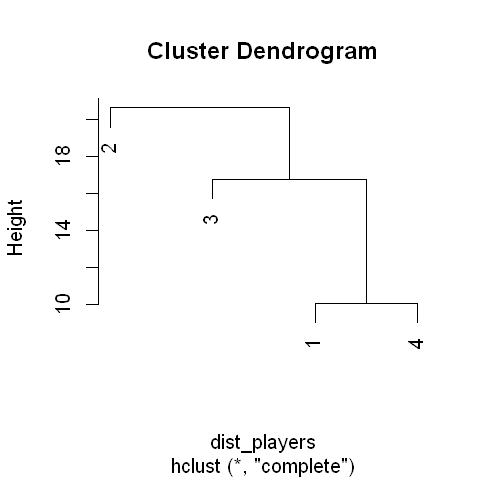

In [38]:
plot(hclust(dist_players, "complete"))

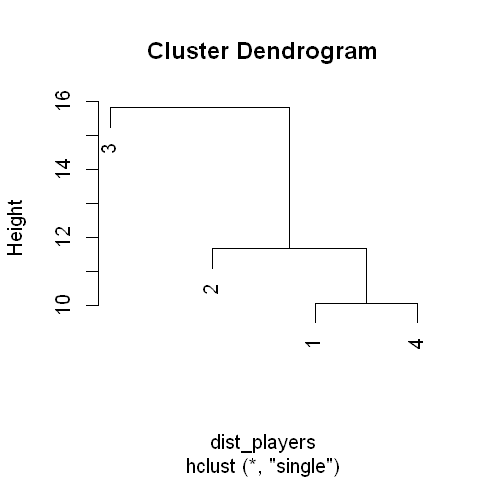

In [39]:
plot(hclust(dist_players, "single"))

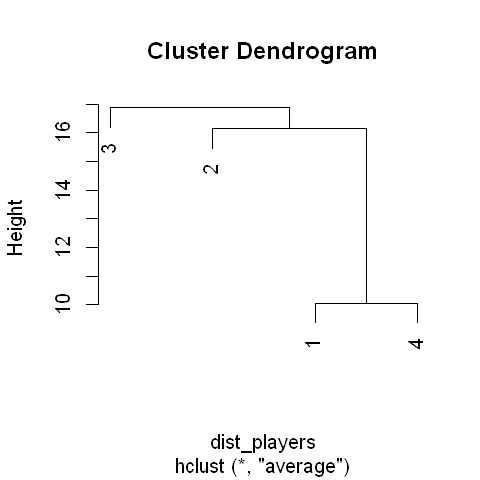

In [40]:
plot(hclust(dist_players, "average"))

## Capturing K clusters - Video

### Assign cluster membership
In this exercise you will leverage the hclust() function to calculate the iterative linkage steps and you will use the cutree() function to extract the cluster assignments for the desired number (k) of clusters.

You are given the positions of 12 players at the start of a 6v6 soccer match. This is stored in the lineup dataframe.

You know that this match has two teams (k = 2), let's use the clustering methods your learned to assign which team each player belongs in based on their position.

Notes:

 - The linkage method can be passed via the method parameter: hclust(distance_matrix, method = "complete")
 - Remember that in soccer opposing teams start on their half of the field.
 - Because these positions are measured using the same scale we do not need to re-scale our data.
 - INSTRUCTIONS
 - 100XP
 - Calculate the euclidean distance matrix dist_players among all twelve players
 - Perform the complete linkage calculation for hierarchical clustring using hclust and store this as hc_players
 - Build the cluster assignment vector clusters_k2 using cutree() with a k = 2
 - Append the cluster assignments as a column cluster to the lineup data frame and save the results to a new dataframe called lineup_k2_complete

In [41]:
lineup = structure(list(x = c(-1, -2, 8, 7, -12, -15, -13, 15, 21, 12, 
-25, 26), y = c(1, -3, 6, -8, 8, 0, -10, 16, 2, -15, 1, 0)), .Names = c("x", 
"y"), class = c("tbl_df", "tbl", "data.frame"), row.names = c(NA, 
-12L))

In [42]:
# Calculate the Distance
dist_players <- dist(lineup)

# Perform the hierarchical clustering using the complete linkage
hc_players <- hclust(dist_players, method="complete")

# Calculate the assignment vector with a k of 2
clusters_k2 <- cutree(hc_players, k=2)

# Create a new dataframe storing these results
lineup_k2_complete <- mutate(lineup, cluster = clusters_k2)

### Exploring the clusters
Because clustering analysis is always in part qualitative, it is incredibly important to have the necessary tools to explore the results of the clustering.

In this exercise you will explore that data frame you created in the previous exercise lineup_k2_complete.

Reminder: The lineup_k2_complete dataframe contains the x & y positions of 12 players at the start of a 6v6 soccer game to which you have added clustering assignments based on the following parameters:

Distance: Euclidean
Number of Clusters (k): 2
Linkage Method: Complete
INSTRUCTIONS

 - Using count() from dplyr, count the number of players assigned to each cluster.
 - Using ggplot(), plot the positions of the players and color them by cluster assignment.

cluster,n
1,6
2,6


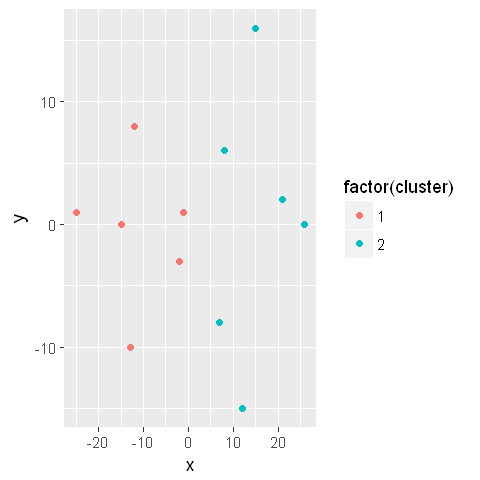

In [43]:
# Count the cluster assignments
count(lineup_k2_complete, cluster)

# Plot the positions of the players and color them using their cluster
ggplot(lineup_k2_complete, aes(x = x, y = y, color = factor(cluster))) +
  geom_point()

## Visualizing the Dendrogram - Video

### Comparing average, single & complete linkage
You are now ready to analyze the clustering results of the lineup dataset using the dendrogram plot. This will give you a new perspective on the effect the decision of the linkage method has on your resulting cluster analysis.

INSTRUCTIONS
100XP
 - Perform the linkage calculation for hierarchical clustring using the linkages: complete, single and average
 - Plot the three dendrograms side by side and review the changes

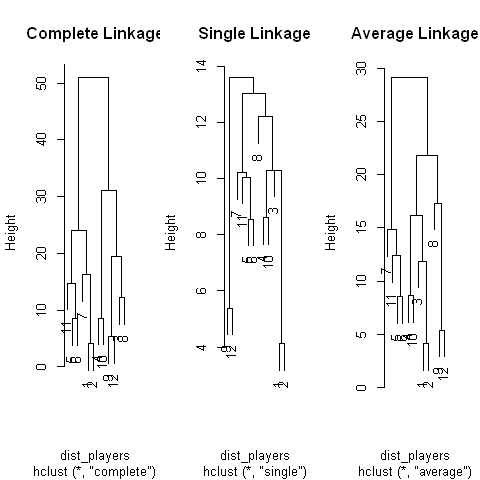

In [44]:
# Prepare the Distance Matrix
dist_players <- dist(lineup)

# Generate hclust for complete, single & average linkage methods
hc_complete <- hclust(dist_players, method="complete")
hc_single <- hclust(dist_players, method="single")
hc_average <- hclust(dist_players, method="average")

# Plot & Label the 3 Dendrograms Side-by-Side
# Hint: To see these Side-by-Side run the 4 lines together as one command
par(mfrow = c(1,3))
plot(hc_complete, main = 'Complete Linkage')
plot(hc_single, main = 'Single Linkage')
plot(hc_average, main = 'Average Linkage')

### Height of the tree
An advantage of working with a clustering method like hierarchical clustering is that you can describe the relationships between your observations based on both the distance metric and the linkage metric selected (the combination of which defines the height of the tree).


Based on the code below what can you concretely say about the height of a branch in the resulting dendrogram?

`dist_players <- dist(lineup, method = 'euclidean')
hc_players <- hclust(dist_players, method = 'single')
plot(hc_players)`



All of the observations linked by this branch must have:

ANSWER THE QUESTION

 - Possible Answers
 - a maximum euclidean distance amongst each other less than or equal to the height of the branch.
 - press 1
 - a minimum Jaccard distance amongst each other less than or equal to the height of the branch.
 - press 2
 - a minimum euclidean distance amongst each other less than or equal to the height of the branch. (Correct)
 - press 3


 Based on this code we can concretely say that for a given branch on a tree all members that are a part of that branch must have a minimum euclidean distance amongst one another equal to or less than the height of that branch.

## Cutting the tree - Video

### Clusters based on height
In previous exercises you have grouped your observations into clusters using a pre-defined number of clusters (k). In this exercise you will leverage the visual representation of the dendrogram in order to group your observations into clusters using a maximum height (h), below which clusters form.

You will work the color_branches() function from the dendextend library in order to visually inspect the clusters that form at any height along the dendrogram.

The hc_players has been carried over from your previous work with the soccer line-up data.

INSTRUCTIONS
100XP
 - Create a denrogram object dend_players from your hclust result using the function as.dendrogram()
 - Plot the dendrogram
 - Using the color_branches() function create & plot a new dendrogram with clusters colored by a cut height of 20
 - Repeat the above step with a height of 40

In [47]:
library(dendextend)

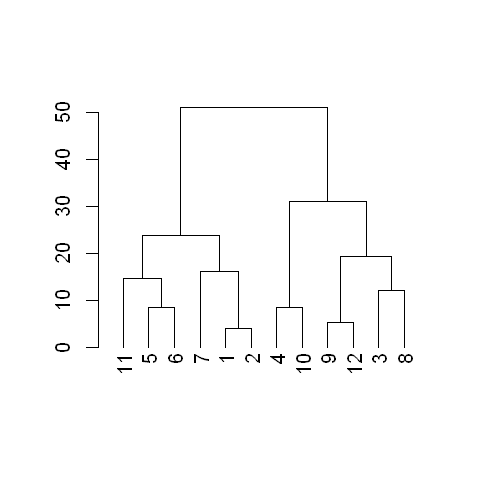

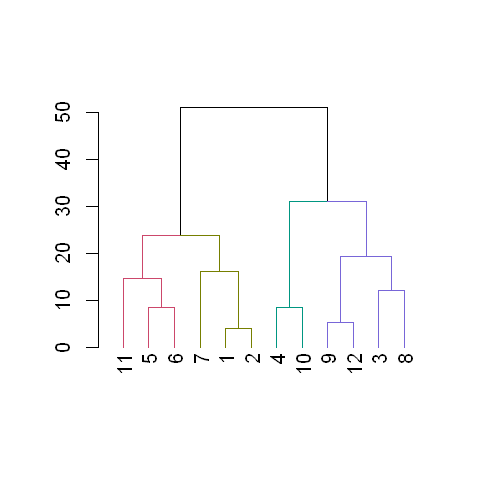

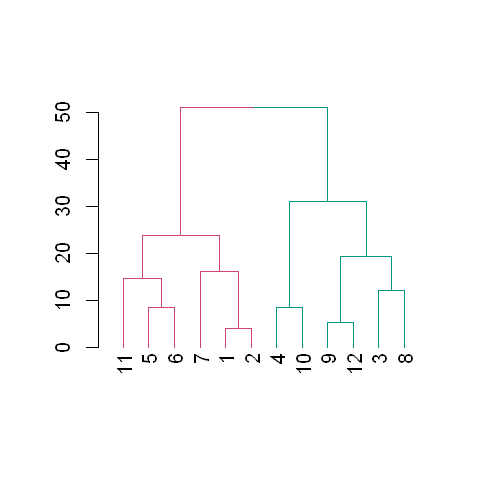

In [48]:
library(dendextend)
dist_players <- dist(lineup, method = 'euclidean')
hc_players <- hclust(dist_players, method = "complete")

# Create a dendrogram object from the hclust variable
dend_players <- as.dendrogram(hc_players)

# Plot the dendrogram
plot(dend_players)

# Color brances by cluster formed from the cut at a height of 20 & plot
dend_20 <- color_branches(dend_players, h = 20)

# Plot the dendrogram with clusters colored below height 20
plot(dend_20)

# Color brances by cluster formed from the cut at a height of 40 & plot
dend_40 <- color_branches(dend_players, h = 40)

# Plot the dendrogram with clusters colored below height 40
plot(dend_40)


Can you see that the height that you use to cut the tree greatly influences the number of clusters and their size? Consider taking a moment to play with other values of height before continuing.

### Exploring the branches cut from the tree
___
The cutree() function you used in exercises 5 & 6 can also be used to cut a tree at a given height by using the h parameter. Take a moment to explore the clusters you have generated from the previous exercises based on the heights 20 & 40.

INSTRUCTIONS

 - Build the cluster assignment vector clusters_h20 using cutree() with a h = 20
 - Append the cluster assignments as a column cluster to the lineup data frame and save the results to a new dataframe called lineup_h20_complete
 - Repeat the above two steps for a height of 40, generating the variables clusters_h40 and lineup_h40_complete
 - Use ggplot2 to create a scatter plot, colored by the cluster assignment for both heights

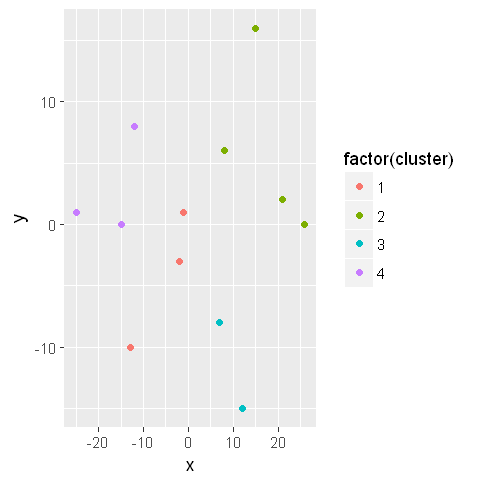

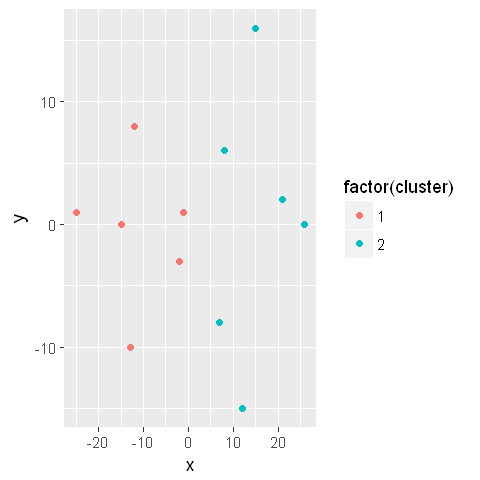

In [49]:
dist_players <- dist(lineup, method = 'euclidean')
hc_players <- hclust(dist_players, method = "complete")

# Calculate the assignment vector with a h of 20
clusters_h20 <- cutree(hc_players, h=20)

# Create a new dataframe storing these results
lineup_h20_complete <- mutate(lineup, cluster = clusters_h20)

# Calculate the assignment vector with a h of 40
clusters_h40 <- cutree(hc_players, h=40)

# Create a new dataframe storing these results
lineup_h40_complete <- mutate(lineup, cluster = clusters_h40)

# Plot the positions of the players and color them using their cluster for height = 20
ggplot(lineup_h20_complete, aes(x = x, y = y, color = factor(cluster))) +
  geom_point()

# Plot the positions of the players and color them using their cluster for height = 40
ggplot(lineup_h40_complete, aes(x = x, y = y, color = factor(cluster))) +
  geom_point()


### What do we know about our clusters?
___**
Based on the code below, what can you concretely say about the relationships of the members within each cluster?

`dist_players <- dist(lineup, method = 'euclidean')
hc_players <- hclust(dist_players, method = 'complete')
clusters <- cutree(hc_players = 40)`

Every member belonging to a cluster must have:

ANSWER THE QUESTION

Possible Answers
 - a maximum euclidean distance to all other members of its cluster that is less than 40. (Correct)
 - press 1
 - a maximum euclidean distance to all other members of its cluster that is greater than or equal to 40.
 - press 2
 - a average euclidean distance to all other members of its cluster that is less than 40.
 - press 3

### Segment wholesale customers
You're now ready to use hierarchical clustering to perform market segmentation (i.e. use consumer characteristics to group them into subgroups).

In this exercise you are provided with the amount spent by 45 different clients of a wholesale distributor for the food categories of Milk, Grocery & Frozen. This is stored in the dataframe customers_spend. Assign these clients into meaningful clusters.

Note: For this exercise you can assume that because the data is all of the same type (amount spent) and you will not need to scale it.

INSTRUCTIONS
100XP
 - Calculate the euclidean distance between the customers and store this in dist_customers
 - Run hierarchical clustering using complete linkage and store in hc_customers
 - Plot the dendrogram
 - Create a cluster assignment vector usign a height of 15,000 and store it as clust_customers
 - Generate a new dataframe segment_customers by appending the cluster assignment as the column cluster to the orignal customers_spend dataframe

In [51]:
customers_spend = readRDS("ws_customers.rds")

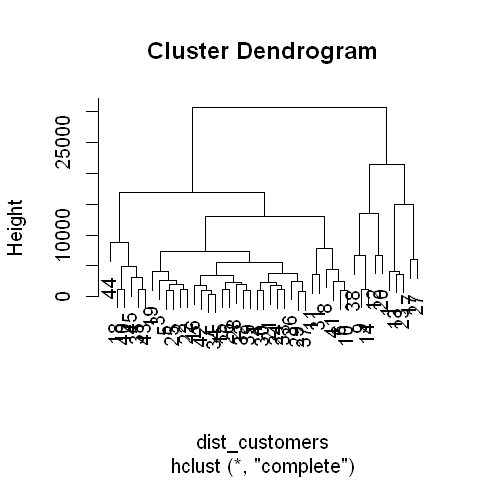

In [52]:
# Calculate euclidean distance between customers
dist_customers <- dist(customers_spend, method="euclidean")

# Generate a complete linkage analysis 
hc_customers <- hclust(dist_customers, method="complete")

# Plot the dendrogram
plot(hc_customers)

# Create a cluster assignment vector at h = 15000
clust_customers <- cutree(hc_customers, h=15000)

# Generate the segmented customers dataframe
segment_customers <- mutate(customers_spend, cluster = clust_customers)

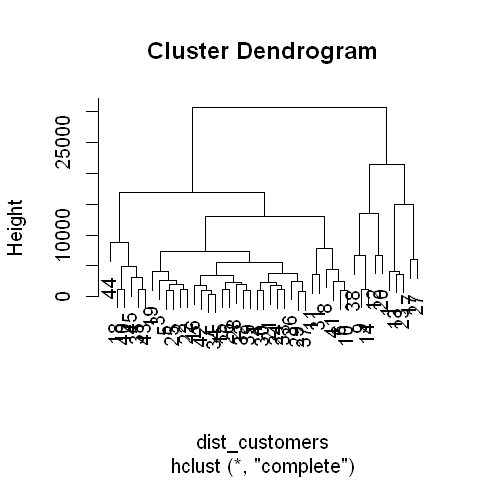

In [53]:
# Calculate euclidean distance between customers
dist_customers <- dist(customers_spend)

# Generate a complete linkage analysis 
hc_customers <- hclust(dist_customers)

# Plot the dendrogram
plot(hc_customers)

# Create a cluster assignment vector at h = 15000
clust_customers <- cutree(hc_customers, h = 15000)

# Generate the segmented customers dataframe
segment_customers <- mutate(customers_spend, cluster = clust_customers)

### Explore wholesale customer clusters
----
Continuing your work on the wholesale dataset you are now ready to analyze the characteristics of these clusters.

Since you are working with more than 2 dimensions it would be challenging to visualize a scatter plot of the clusters, instead you will rely on summary statistics to explore these clusters. In this exercise you will analyze the mean amount spent in each cluster for all three categories.

INSTRUCTIONS
100XP
 - Calculate the size of each cluster using count().
 - Color & plot the dendrogram using the height of 15,000.
 - Calculate the average spending for each category within each cluster using the summarise_all() function.
 - 

cluster,n
1,5
2,29
3,5
4,6


cluster,Milk,Grocery,Frozen
1,16950.000,12891.400,991.200
2,2512.828,5228.931,1795.517
3,10452.200,22550.600,1354.800
4,1249.500,3916.833,10888.667


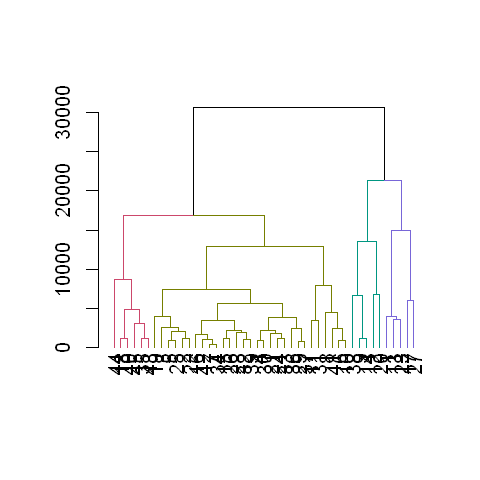

In [54]:
dist_customers <- dist(customers_spend)
hc_customers <- hclust(dist_customers)
clust_customers <- cutree(hc_customers, h = 15000)
segment_customers <- mutate(customers_spend, cluster = clust_customers)

# Count the number of customers that fall into each cluster
count(segment_customers, cluster)

# Color the dendrogram based on the height cutoff
dend_customers <- as.dendrogram(hc_customers)
dend_colored <- color_branches(dend_customers, h=15000)

# Plot the colored dendrogram
plot(dend_colored)

# Calculate the mean for each category
segment_customers %>% 
  group_by(cluster) %>% 
  summarise_all(funs(mean(.)))

### Interpreting the wholesale customer clusters
What observations can we make about our segments based on their average spending in each category?

cluster	Milk	Grocery	Frozen	cluster size
1	16950	12891	991	5
2	2512	5228	1795	29
3	10452	22550	1354	5
4	1249	3916	10888	6
ANSWER THE QUESTION

Possible Answers
 - press 1 : Customers in cluster 1 spent more money on Milk than any other cluster
 
 - press 2 : Customers in cluster 3 spent more money on Grocery than any other cluster

 - press 3 : Customers in cluster 4 spent more money on Frozen goods than any other cluster

 - press 4 : The majority of customers fell into cluster 2 and did not show any excessive spending in any category

 - press 5 : All of the above (Correct)

Given the results of these clusters all 4 statements are resonable statements. Whether this is meaningful would heavily depend on the business context it is used for. Ask yourself these questions:
 - Are clusters of 6 or less meaningful for my question?
 - Likewise, does the large cluster of 29 need to be split up?
 - Are the distance, linkage and height decisions employed appropriate to your problem?

The key to mastering clustering analysis is to keep asking these questions!

# 3. K-means clustering

In this chapter, you will build an understanding of the principles behind the k-means algorithm, learn how to select the right k when it isn't previously known, and revisit the wholesale data from a different perspective.

## Introduction to K-means - Video


In [8]:
lineup = readRDS("lineup.rds")

In [9]:
head(lineup)

x,y
-1,1
-2,-3
8,6
7,-8
-12,8
-15,0


### K-means on a soccer field
In the previous chapter you used the lineup dataset to learn about hierarchical clustering, in this chapter you will use the same data to learn about k-means clustering. As a reminder, the lineup dataframe contains the positions of 12 players at the start of a 6v6 soccer match.

Just like before, you know that this match has two teams on the field so you can perform a k-means analysis using k = 2 in order to determine which player belongs to which team.

Note that in the kmeans() function k is specified using the centers parameter.

INSTRUCTIONS

 - Build a k-means model called model_km2 for the lineup data using the kmeans() function with centers = 2
 - Extract the vector of cluster assignments from the model model_km2$cluster and store this in the variable clust_km2
 - Append the cluster assignments as a column cluster to the lineup data frame and save the results to a new dataframe called lineup_km2
 - Use ggplot to plot the positions of each player on the field and color them by their cluster

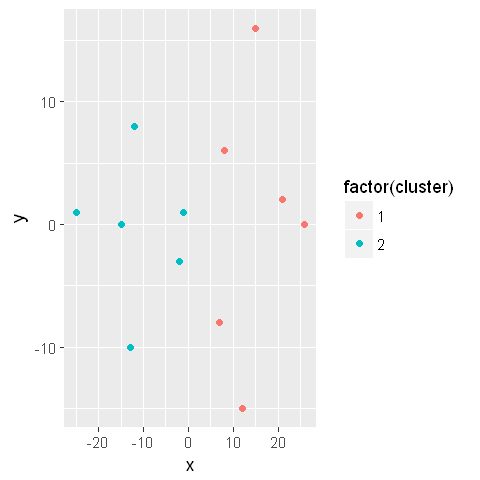

In [10]:
# Build a kmeans model
model_km2 <- kmeans(lineup, centers = 2)

# Extract the cluster assignment vector from the kmeans model
clust_km2 <- model_km2$cluster

# Create a new dataframe appending the cluster assignment
lineup_km2 <- mutate(lineup, cluster = clust_km2)

# Plot the positions of the players and color them using their cluster
ggplot(lineup_km2, aes(x = x, y = y, color = factor(cluster))) +
  geom_point()

Well done! Knowing the desired number of clusters ahead of time can be very helpful when performing a k-means analysis. In the next section we will see what happens when we use an incorrect value of k.

### K-means on a soccer field (part 2)
In the previous exercise you successfully used the k-means algorithm to cluster the two teams from the lineup data frame. This time, let's explore what happens when you use a k of 3.

You will see that the algorithm will still run, but does it actually make sense in this context...

INSTRUCTIONS
100XP

 - Build a k-means model called model_km3 for the lineup data using the kmeans() function with centers = 3
 - Extract the vector of cluster assignments from the model model_km3$cluster and store this in the variable clust_km3
 - Append the cluster assignments as a column cluster to the lineup data frame and save the results to a new dataframe called lineup_km3
 - Use ggplot to plot the positions of each player on the field and color them by their cluster

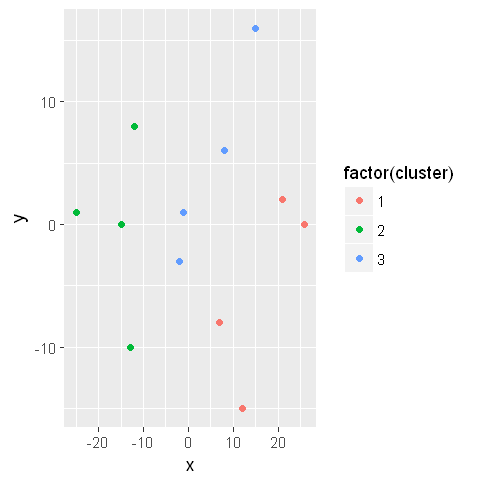

In [11]:
# Build a kmeans model
model_km3 <- kmeans(lineup, centers=3)

# Extract the cluster assignment vector from the kmeans model
clust_km3 <- model_km3$cluster

# Create a new dataframe appending the cluster assignment
lineup_km3 <- mutate(lineup, cluster = clust_km3)

# Plot the positions of the players and color them using their cluster
ggplot(lineup_km3, aes(x = x, y = y, color = factor(cluster))) +
  geom_point()

Does this result make sense? Remember we only have 2 teams on the field. It's very important to remember that k-means will run with any k that is more than 2 and less than your total observations, but it doesn't always mean the results will be meaningful.

## Evaluating different values of K by eye - Video

### Many K's many models
While the lineup dataset clearly has a known value of k, often times the optimal number of clusters isn't known and must be estimated.

In this exercise you will leverage map_dbl() from the purrr library to run k-means using values of k ranging from 1 to 10 and extract the total within-cluster sum of squares metric from each one. This will be the first step towards visualizing the elbow plot.

INSTRUCTIONS
100XP

 - Use map_dbl() to run kmeans() using the lineup data for k values ranging from 1 to 10 and extract the total within-cluster sum of squares value from each model: model$tot.withinss
 - Store the resulting vector as tot_withinss
 - Build a new dataframe elbow_df containing the values of k and the vector of total within-cluster sum of squares

In [12]:
library(purrr)

# Use map_dbl to run many models with varying value of k (centers)
tot_withinss <- map_dbl(1:10,  function(k){
  model <- kmeans(lineup, centers = k)
  model$tot.withinss
})

# Generate a data frame containing both k and tot_withinss
elbow_df <- data.frame(
  k = 1:10 ,
  tot_withinss = tot_withinss
)

Warning message:
"package 'purrr' was built under R version 3.4.3"

### Elbow (Scree) plot
In the previous exercises you have calculated the total within-cluster sum of squares for values of k ranging from 1 to 10. You can visualize this relationship using a line plot to create what is known as an elbow plot (or scree plot).

When looking at an elbow plot you want to see a sharp decline from one k to another followed by a more gradual decrease in slope. The last value of k before the slope of the plot levels off suggests a "good" value of k.

INSTRUCTIONS
100XP

 - Continuing your work from the previous exercise, use the values in elbow_df to plot a line plot showing the relationship between k and total within-cluster sum of squares

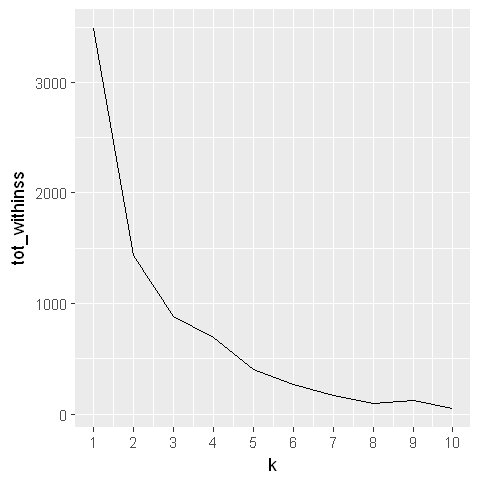

In [13]:
# Use map_dbl to run many models with varying value of k (centers)
tot_withinss <- map_dbl(1:10,  function(k){
  model <- kmeans(x = lineup, centers = k)
  model$tot.withinss
})

# Generate a data frame containing both k and tot_withinss
elbow_df <- data.frame(
  k = 1:10,
  tot_withinss = tot_withinss
)

# Plot the elbow plot
ggplot(elbow_df, aes(x = k, y = tot_withinss)) +
  geom_line() +
  scale_x_continuous(breaks = 1:10)

You have learned how to create and visualize elbow plots as a tool for finding a “good” value of k. In the next section you will add another tool to your aresnal for finding k.

## Silhouette analysis: Observation level performance - Video

### Silhouette analysis
Silhouette analysis allows you to calculate how similar each observations is with the cluster it is assigned relative to other clusters. This metric (silhouette width) ranges from -1 to 1 for each observation in your data and can be interpreted as follows:

Values close to 1 suggest that the observation is well matched to the assigned cluster
Values close to 0 suggest that the observation is borderline matched between two clusters
Values close to -1 suggest that the observations may be assigned to the wrong cluster
In this exercise you will leverage the pam() and the silhouette() functions from the clusters library to perform silhouette analysis to compare the results of models with a k of 2 an a k of 3. You'll continue working with the lineup dataset.

Pay close attention to the silhouette plot, does each observation clearly belong to its assigned cluster for k = 3?

INSTRUCTIONS
100XP

 - Generate a k-means model pam_k2 using pam() with k = 2 on the lineup data.
 - Plot the silhouette analysis using plot(silhouette(model)).
 - Repeat the first two steps for k = 3, saving the model as pam_k3.
 - Make sure to review the differences between the plots before proceeding (especially observation 3) for pam_k3.

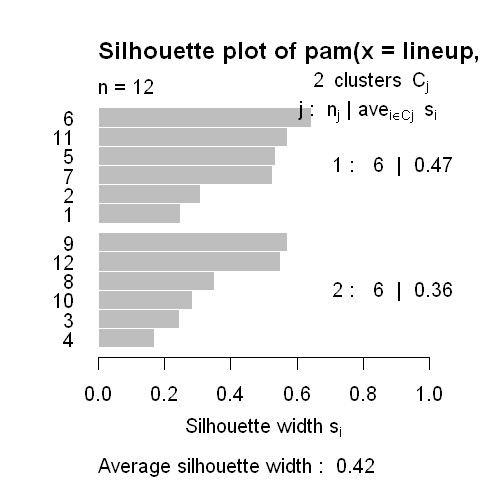

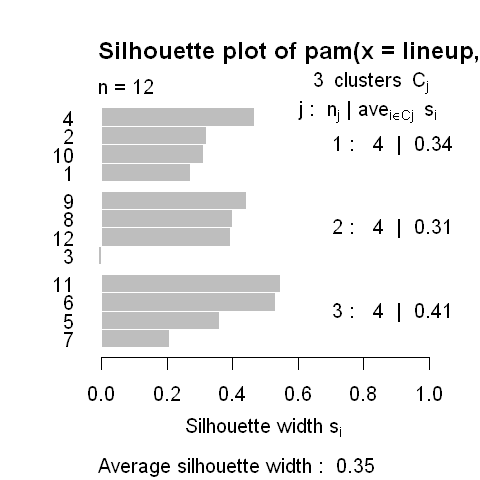

In [14]:
library(cluster)

# Generate a k-means model using the pam() function with a k = 2
pam_k2 <- pam(lineup, k = 2)

# Plot the silhouette visual for the pam_k2 model
plot(silhouette(pam_k2))

# Generate a k-means model using the pam() function with a k = 3
pam_k3 <- pam(lineup, k = 3)

# Plot the silhouette visual for the pam_k3 model
plot(silhouette(pam_k3))


Great work! Did you notice that for k = 2, no observations has a silhouette with close to 0? What about the fact that for k = 3, observation 3 is close to 0 and is negative? This suggests that k = 3 is not the right number of clusters.

### Making sense of the K-means clusters - Video

In [16]:
customers_spend = readRDS("ws_customers.rds")

### Revisiting wholesale data: "Best" k
At the end of Chapter 2 you explored wholesale distributor data customers_spend using hierarchical clustering. This time you will analyze this data using the k-means clustering tools covered in this chapter.

The first step will be to determine the "best" value of k using average silhouette width.

A refresher about the data: it contains records of the amount spent by 45 different clients of a wholesale distributor for the food categories of Milk, Grocery & Frozen. This is stored in the dataframe customers_spend. For this exercise you can assume that because the data is all of the same type (amount spent) and you will not need to scale it.

INSTRUCTIONS
100XP

 - Use map_dbl() to run pam() using the customers_spend data for k values ranging from 2 to 10 and extract the average silhouette width value from each model: model$silinfo$avg.width Store the resulting vector as sil_width
 - Build a new dataframe sil_df containing the values of k and the vector of average silhouette widths
 - Use the values in sil_df to plot a line plot showing the relationship between k and average silhouette width

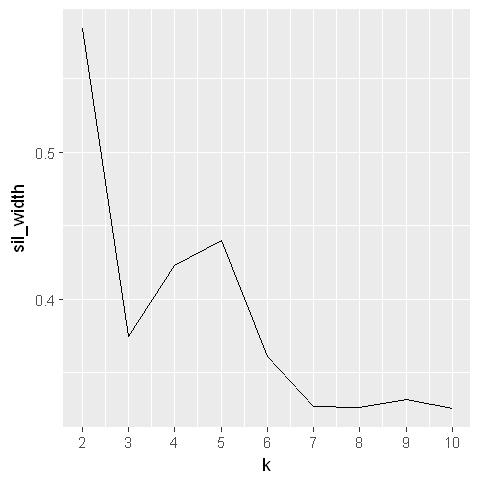

In [17]:
# Use map_dbl to run many models with varying value of k
sil_width <- map_dbl(2:10,  function(k){
  model <- pam(x = customers_spend, k = k)
  model$silinfo$avg.width
})

# Generate a data frame containing both k and sil_width
sil_df <- data.frame(
  k = 2:10,
  sil_width = sil_width
)

# Plot the relationship between k and sil_width
ggplot(sil_df, aes(x = k, y = sil_width)) +
  geom_line() +
  scale_x_continuous(breaks = 2:10)

In [18]:
sil_df[order(sil_width, decreasing=TRUE),]

,k,sil_width
1,2,0.5842282
4,5,0.4397891
3,4,0.4225053
2,3,0.3741916
5,6,0.3609199
8,9,0.3319012
6,7,0.3270878
7,8,0.3263239
9,10,0.3255676


You're doing great! From the plot I hope you noticed that k = 2 has the highest average sillhouette width and is the “best” value of k we will move forward with.

### Revisiting wholesale data: Exploration
From the previous analysis you have found that k = 2 has the highest average silhouette width. In this exercise you will continue to analyze the wholesale customer data by building and exploring a kmeans model with 2 clusters.

INSTRUCTIONS
100XP

 - Build a k-means model called model_customers for the customers_spend data using the kmeans() function with centers = 2.
 - Extract the vector of cluster assignments from the model model_customers$cluster and store this in the variable clust_customers.
 - Append the cluster assignments as a column cluster to the customers_spend data frame and save the results to a new dataframe called segment_customers.
 - Calculate the size of each cluster using count().

In [21]:
# Build a k-means model for the customers_spend with a k of 2
model_customers <- kmeans(customers_spend, centers=2)

# Extract the vector of cluster assignments from the model
clust_customers <- model_customers$cluster

# Build the segment_customers dataframe
segment_customers <- mutate(customers_spend, cluster = clust_customers)

# Calculate the size of each cluster
count(segment_customers, cluster)

# Calculate the mean for each category
segment_customers %>% 
  group_by(cluster) %>% 
  summarise_all(funs(mean(.)))

cluster,n
1,10
2,35


cluster,Milk,Grocery,Frozen
1,13701.100,17721,1173.000
2,2296.257,5004,3354.343


Well done! It seems that in this case cluster 1 consists of individuals who proportionally spend more on Frozen food while cluster 2 customers spent more on Milk and Grocery. Did you notice that when you explored this data using hierarchical clustering, the method resulted in 4 clusters while using k-means got you 2. Both of these results are valid, but which one is appropriate for this would require more subject matter expertise. Before you proceed with the next chapter, remember that: Generating clusters is a science, but interpreting them is an art.

# 4. Case Study: National Occupational mean wage

In this chapter, you will apply the skills you have learned to explore how the average salary amongst professions have changed over time.

## Occupational wage date - Video

In [7]:
oes = readRDS("oes.rds")
head(oes)

,2001,2002,2003,2004,2005,2006,2007,2008,2010,2011,2012,2013,2014,2015,2016
Management,70800,78870,83400,87090,88450,91930,96150,100310,105440,107410,108570,110550,112490,115020,118020
Business Operations,50580,53350,56000,57120,57930,60000,62410,64720,67690,68740,69550,71020,72410,73800,75070
Computer Science,60350,61630,64150,66370,67100,69240,72190,74500,77230,78730,80180,82010,83970,86170,87880
Architecture/Engineering,56330,58020,60390,63060,63910,66190,68880,71430,75550,77120,79000,80100,81520,82980,84300
Life/Physical/Social Sci.,49710,52380,54930,57550,58030,59660,62020,64280,66390,67470,68360,69400,70070,71220,72930
Community Services,34190,34630,35800,37050,37530,39000,40540,41790,43180,43830,44240,44710,45310,46160,47200


### Initial exploration of the data
You are presented with data from the Occupational Employment Statistics (OES) program which produces employment and wage estimates annually. This data contains the yearly average income from 2001 to 2016 for 22 occupation groups. You would like to use this data to identify clusters of occupations that maintained similar income trends.

The data is stored in your environment as the data.matrix oes.

Before you begin to cluster this data you should determine whether any pre-processing steps (such as scaling and imputation) are necessary.

Leverage the functions head() and summary() to explore the oes data in order to determine which of the pre-processing steps below are necessary:

INSTRUCTIONS

Possible Answers
 - NA values exist in the data, hence the values must be imputed or the observations with NAs excluded.
 - press 1
 - The variables within this data are not comparable to one another and should be scaled.
 - press 2
 - Categorical variables exist within this data and should be appropriately dummified.
 - press 3
 - All three pre-processing steps above are necessary for this data.
 - press 4
 - None of these pre-processing steps are necessary for this data. (Correct)
 - press 5

Correct, there are no missing values, no categorical and the features are on the same scale. 
Now you're ready to cluster this data!

### Hierarchical clustering: Occupation trees
In the previous exercise you have learned that the oes data is ready for hierarchical clustering without any preprocessing steps necessary. In this exercise you will take the necessary steps to build a dendrogram of occupations based on their yearly average salaries and propose clusters using a height of 100,000.

INSTRUCTIONS
100XP

 - Calculate the euclidean distance between the occupations and store this in dist_oes
 - Run hierarchical clustering using average linkage and store in hc_oes
 - Create a denrogram object dend_oes from your hclust result using the function as.dendrogram()
 - Plot the dendrogram
 - Using the color_branches() function create & plot a new dendrogram with clusters colored by a cut height of 100,000


In [6]:
library(dendextend)

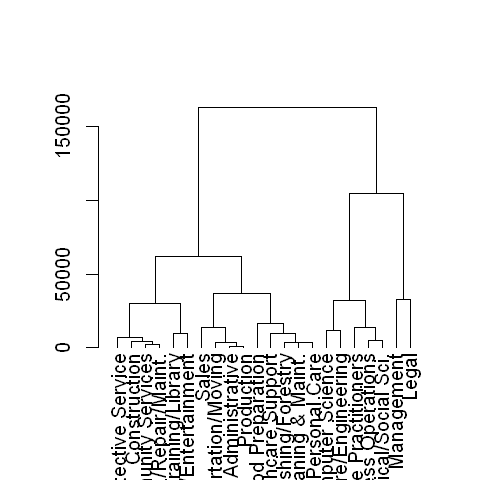

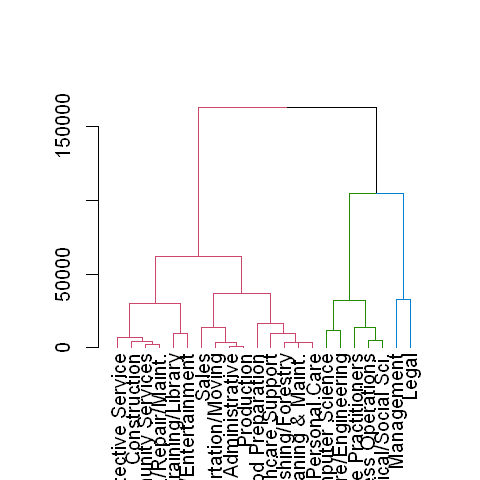

In [8]:
# Calculate euclidean distance between the occupations
dist_oes <- dist(oes, method = "euclidean")

# Generate an average linkage analysis 
hc_oes <- hclust(dist_oes, method = "average")

# Create a dendrogram object from the hclust variable
dend_oes <- as.dendrogram(hc_oes)

# Plot the dendrogram
plot(dend_oes)

# Color brances by cluster formed from the cut at a height of 100000
dend_colored <- color_branches(dend_oes, h = 100000)

# Plot the colored dendrogram
plot(dend_colored)

Well done! Based on the dendrogram it may be reasonable to start with the three clusters formed at a height of 100,000. The members of these clusters appear to be tightly grouped but different from one another. Let's continue this exploration.

### Hierarchical clustering: Preparing for exploration
You have now created a potential clustering for the oes data, before you can explore these clusters with ggplot2 you will need to process the oes data matrix into a tidy data frame with each occupation assigned its cluster.

INSTRUCTIONS

 - Create the df_oes data frame from the oes data.matrix, making sure to store the rowname as a column (use rownames_to_column() from the tibble library)
 - Build the cluster assignment vector cut_oes using cutree() with a h = 100,000
 - Append the cluster assignments as a column cluster to the df_oes data frame and save the results to a new dataframe called clust_oes
 - Use the gather() function from the tidyr() library to reshape the data into a format amenable for ggplot2 analysis and save the tidied data frame as gather_oes

In [33]:
dist_oes <- dist(oes, method = 'euclidean')
hc_oes <- hclust(dist_oes, method = 'average')

library(tibble)
library(tidyr)

# Use rownames_to_column to move the rownames into a column of the data frame
df_oes <- rownames_to_column(as.data.frame(oes), var = 'occupation')

# Create a cluster assignment vector at h = 100,000
cut_oes <- cutree(hc_oes, h = 100000)

# Generate the segmented the oes dataframe
clust_oes <- mutate(df_oes, cluster = cut_oes)

# Create a tidy data frame by gathering the year and values into two columns
gathered_oes <- gather(data = clust_oes, 
                       key = year, 
                       value = mean_salary, 
                       -occupation, -cluster)

Warning message:
"package 'tibble' was built under R version 3.4.3"Warning message:
"package 'tidyr' was built under R version 3.4.3"

In [34]:
head(gathered_oes)

occupation,cluster,year,mean_salary
Management,1,2001,70800
Business Operations,2,2001,50580
Computer Science,2,2001,60350
Architecture/Engineering,2,2001,56330
Life/Physical/Social Sci.,2,2001,49710
Community Services,3,2001,34190


You now have the dataframes necessary to explore the results of this clustering

### Hierarchical clustering: Plotting occupational clusters
You have succesfully created all the parts necessary to explore the results of this hierarchical clustering work. In this exercise you will leverage the named assignment vector cut_oes and the tidy data frame gathered_oes to analyze the resulting clusters.

INSTRUCTIONS

 - View the assignments of each occupation to their clustering by sorting the cut_oes vector using sort()
 - Use ggplot2 to plot each occupation's average income by year and color the lines by the occupation's assigned cluster.


Management                      Legal 
                         1                          1 
       Business Operations           Computer Science 
                         2                          2 
  Architecture/Engineering  Life/Physical/Social Sci. 
                         2                          2 
  Healthcare Practitioners         Community Services 
                         2                          3 
Education/Training/Library  Arts/Design/Entertainment 
                         3                          3 
        Healthcare Support         Protective Service 
                         3                          3 
          Food Preparation  Grounds Cleaning & Maint. 
                         3                          3 
             Personal Care                      Sales 
                         3                          3 
     Office Administrative   Farming/Fishing/Forestry 
                         3                          3 
              Construction Installation/Repair/Maint. 
                         3                          3 
                Production      Transportation/Moving 
                         3                          3

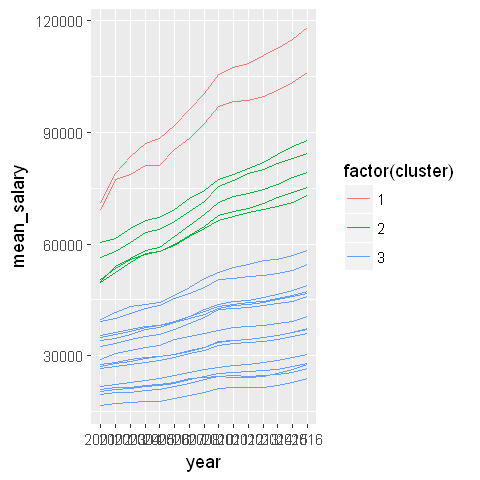

In [35]:
# View the clustering assignments by sorting the cluster assignment vector
sort(cut_oes)

# Plot the relationship between mean_salary and year and color the lines by the assigned cluster
ggplot(gathered_oes, aes(x = year, y = mean_salary, color = factor(cluster))) + 
    geom_line(aes(group = occupation))


Cool huh! From this work it looks like both Management & Legal professions (cluster 1) experienced the most rapid growth in these 15 years. Let's see what we can get by exploring this data using k-means.

## Reviewing the HC Results - Video

### K-means: Elbow analysis
In the previous exercises you used the dendrogram to proposed a clustering that generated 3 trees. In this exercise you will leverage the k-means elbow plot to propose the "best" number of clusters.

INSTRUCTIONS
100XP

 - Use map_dbl() to run kmeans() using the oes data for k values ranging from 1 to 10 and extract the total within-cluster sum of squares value from each model: model$tot.withinss
 - Store the resulting vector as tot_withinss
 - Build a new dataframe elbow_df containing the values of k and the vector of total within-cluster sum of squares
 - Use the values in elbow_df to plot a line plot showing the relationship between k and total within-cluster sum of squares

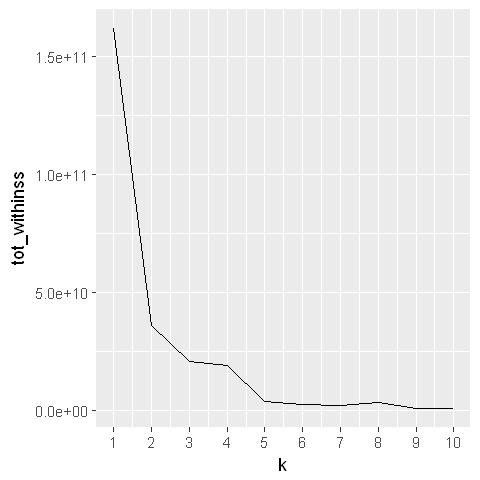

In [36]:
# Use map_dbl to run many models with varying value of k (centers)
tot_withinss <- map_dbl(1:10,  function(k){
  model <- kmeans(x = oes, centers = k)
  model$tot.withinss
})

# Generate a data frame containing both k and tot_withinss
elbow_df <- data.frame(
  k = 1:10,
  tot_withinss = tot_withinss
)

# Plot the elbow plot
ggplot(elbow_df, aes(x = k, y = tot_withinss)) +
  geom_line() +
  scale_x_continuous(breaks = 1:10)

In [37]:
elbow_df

k,tot_withinss
1,161931542045
2,36135001888
3,20586285113
4,19278660758
5,3729943983
6,2524129050
7,2306105040
8,3431838115
9,1002316883
10,894960467


Fascinating! So the elbow analysis proposes a different value of k, in the next section let's see what we can learn from Silhouette Width Analysis.

### K-means: Average Silhouette Widths
So hierarchical clustering resulting in 3 clusters and the elbow method suggests 2. In this exercise use average silhouette widths to explore what the "best" value of k should be.

INSTRUCTIONS
100XP

 - Use map_dbl() to run pam() using the oes data for k values ranging from 2 to 10 and extract the average silhouette width value from each model: `model$silinfo$avg.width` Store the resulting vector as sil_width
 - Build a new dataframe sil_df containing the values of k and the vector of average silhouette widths
 - Use the values in sil_df to plot a line plot showing the relationship between k and average silhouette width

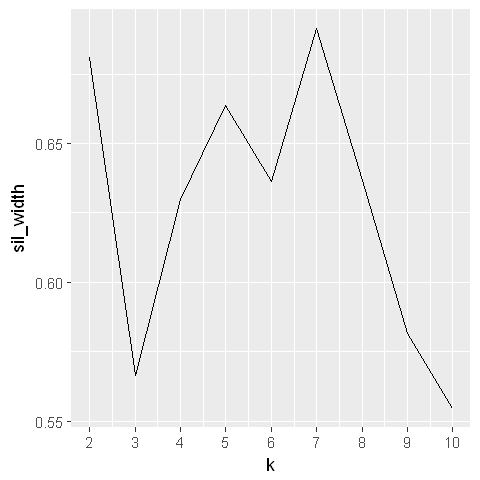

In [38]:
# Use map_dbl to run many models with varying value of k
sil_width <- map_dbl(2:10,  function(k){
  model <- pam(oes, k = k)
  model$silinfo$avg.width
})

# Generate a data frame containing both k and sil_width
sil_df <- data.frame(
  k = 2:10,
  sil_width = sil_width
)

# Plot the relationship between k and sil_width
ggplot(sil_df, aes(x = k, y = sil_width)) +
  geom_line() +
  scale_x_continuous(breaks = 2:10)

In [39]:
sil_df[order(sil_width, decreasing=TRUE),]

,k,sil_width
6,7,0.6915586
1,2,0.6809574
4,5,0.6637260
7,8,0.6366426
5,6,0.6361872
3,4,0.6300043
8,9,0.5816429
2,3,0.5665783
9,10,0.5545481


Great work! It seems that this analysis results in another value of k, this time 7 is the top contender (although 2 comes very close).

### The "best" number of clusters
You ran three different methods for finding the optimal number of clusters and their assignments and you arrived with three different answers.

Below you will find a comparison between the 3 clustering results (via coloring of the occupations based on the clusters to which they belong).

oes_clusters

What can you say about the "best" way to cluster this data?

ANSWER THE QUESTION

Possible Answers
 - The clusters generated by the hierarchical clustering all have members with a euclidean distance amongst one another less than 100,000 and hence is the best clustering method.
 - press 1
 - The clusters generated using k-means with a k = 2 was identified using elbow analysis and hence is the best way to cluster this data.
 - press 2
 - The clusters generated using k-means with a k = 7 has the largest Average Silhouette Widths among the cluster and hence is the best way to cluster this data.
 - press 3
 - All of the above are correct but the best way to cluster is highly dependent on how you would use this data after. (Correct)
 - press 4


All 3 statements are correct but there is no quantitative way to determine which of these clustering approaches is the right one without futher exploration.

## Review K-means Results - Video

**Building intuition for your method is just as, if not more important than learning how to use their associated tools.**

# Thanks You